# Graded Challenge 1

Nama  : Krisbiantoro Prabowo

Batch : 008


## Description
<hr>

Dataset Pokemon memiliki 800 baris berisi 721 data pokemon termasuk evolusinya dimana informasi pokemon meliputi ID(#), name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed. Tidak semua pokemon memiliki lebih dari satu jenis/tipe pokemon, oleh karena itu beberapa pokemon memiliki nilai kosong pada kolom tipe kedua

### Objective

1. Memuat dataset pokemon menggunakan pandas
2. Menangani Missing Values dan Mengubah nama kolom agar pemanggilan nama kolom pada syntax lebih mudah untuk diingat
3. Memanggil Query:
    - Memanggil 5 teratas data pokemon bertipe `Rock` pada kolom Tipe 1 yang memiliki HP diatas rata-rata pada pokemon berjenis ini
    - Memanggil 5 terbawah data pokemon legendary yang memiliki dua jenis/tipe dengan status attack dibawah rata-rata pokemon legendary
    - Memanggil data pokemon generasi ke-2 dengan memiliki status speed yang paling rendah
4. Melakukan Grouping dan Aggregating:
    - Mengelompokkan Pokemon legendary berdasarkan tiap-tiap generasi
    - Mengelompokkan Pokemon legendary yang terdapat pada generasi ke-3 berdasarkan jenis pada tipe 1 pokemon tersebut.
    - Mengelompokkan 20 teratas Pokemon legendary yang memiliki speed tertinggi berdasarkan tipe 2 pokemon tersebut dengan catatan tipe 2 tidak boleh bernilai `none`
5. Menampilkan hasil pengelompokkan pada poin ke 4 menggunakan grafik dalam bentuk bar
6. Menarik Informasi/Kesimpulan Dari Keseluruhan Explorasi yang Dilakukan

## Working Area
<hr>

### Import Library

In [1]:
import pandas as pd

### Data Loading

In [2]:
pk = pd.read_csv("dataset/pokemon.csv")

pk.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Detailed Information

In [3]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Handle Missing Values

baris pada `type_2` yang masih kosong dapat diisi dengan `none` agar seluruh kolom memiliki jumlah baris data yang sama.

In [4]:
pk['Type 2'].fillna(
    value="None",
    inplace=True
)

pk.head()

pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Columns Manipulate

pada manipulasi kolom, nama kolom diubah menjadi format `nama_kolom` (semua huruf kecil dengan pemisah menggunakan **_**) agar pemanggilan kolom dapat lebih mudah diingat. Kolom-kolom seperti `defense, sp.Atk, sp.Def, total` juga dihapus karena tidak dibutuhkan dalam pemanggilan query kedepannya.

In [5]:
name2change = {
    "Name":"name",
    "Type 1": "type_1",
    "Type 2": "type_2",
    "Total": "total",
    "HP": "hp",
    "Attack": "attack",
    "Defense": "defense",
    "Sp. Atk": "sp_attack",
    "Sp. Def": "sp_def",
    "Speed": "speed",
    "Generation": "generation",
    "Legendary": "legendary"
}

pk.rename(columns=name2change, inplace=True)

column2drop=["defense","sp_attack","sp_def","total"]
pk.drop(column2drop, inplace=True, axis=1)


Memastikan bahwa semua nama kolom sudah berhasil diubah dan kolom yang tidak dibutuhkan juga sudah berhasil dihapuskan

In [6]:
pk.head()

,#,name,type_1,type_2,hp,attack,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,45,49,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,60,1,False
2,3,Venusaur,Grass,Poison,80,82,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,80,1,False
4,4,Charmander,Fire,None,39,52,65,1,False


### Data Query

- Memanggil 5 teratas data pokemon bertipe `Rock` pada kolom Tipe 1 yang memiliki HP diatas rata-rata pada pokemon berjenis ini

In [7]:
mean_hp = pk['hp'][(pk['type_1'] =='Rock')].mean()
print("Rata-rata HP Pokemon bertipe 'Rock':", mean_hp)

pk.query(f"type_1=='Rock' & hp >= {mean_hp}").sort_values('hp', ascending=False).iloc[:5]

Rata-rata HP Pokemon bertipe 'Rock': 65.36363636363636


,#,name,type_1,type_2,hp,attack,speed,generation,legendary
769,699,Aurorus,Rock,Ice,123,77,58,6,False
267,248,Tyranitar,Rock,Dark,100,134,61,2,False
268,248,TyranitarMega Tyranitar,Rock,Dark,100,164,71,2,False
454,409,Rampardos,Rock,None,97,165,58,4,False
700,639,Terrakion,Rock,Fighting,91,129,108,5,True


- Memanggil 5 terbawah data pokemon legendary yang memiliki dua jenis/tipe dengan status attack dibawah rata-rata pokemon legendary

In [8]:
mean_attack = pk['attack'][(pk['legendary'] ==True)].mean()
print("Rata-rata ATK Pokemon Legendary: ",mean_attack)

pk.query(f"legendary==True & type_2 == 'None' & attack <{mean_attack}").sort_values('attack', ascending=True).iloc[:5]

Rata-rata ATK Pokemon Legendary:  116.67692307692307


,#,name,type_1,type_2,hp,attack,speed,generation,legendary
415,378,Regice,Ice,None,80,50,50,3,True
430,386,DeoxysDefense Forme,Psychic,None,50,70,90,3,True
264,245,Suicune,Water,None,100,75,85,2,True
416,379,Registeel,Steel,None,80,75,50,3,True
537,480,Uxie,Psychic,None,75,75,95,4,True


- Memanggil data pokemon generasi ke-2 dengan memiliki status speed yang paling rendah

In [9]:
pk.query(f"{pk['speed'][(pk['generation']==2)].idxmin()}")

#                 213
name          Shuckle
type_1            Bug
type_2           Rock
hp                 20
attack             10
speed               5
generation          2
legendary       False
Name: 230, dtype: object

### Grouping & Aggregation

- Mengelompokkan Pokemon legendary berdasarkan tiap-tiap generasi

In [10]:
import matplotlib.pyplot as plt
pk.query("legendary==True").groupby('generation')['generation'].count()


generation
1     6
2     5
3    18
4    13
5    15
6     8
Name: generation, dtype: int64

<AxesSubplot:xlabel='generation'>

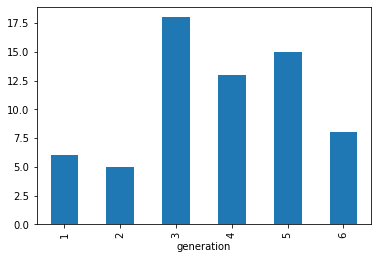

In [11]:
pk.query("legendary==True").groupby('generation')['generation'].count().plot(kind="bar")

- Mengelompokkan Pokemon legendary yang terdapat pada generasi ke-3 berdasarkan jenis pada tipe 1 pokemon tersebut.

In [12]:
pk.query("legendary==True & generation==3").groupby(['type_1'])['type_1'].count()

type_1
Dragon     6
Ground     2
Ice        1
Psychic    4
Rock       1
Steel      2
Water      2
Name: type_1, dtype: int64

<AxesSubplot:xlabel='type_1'>

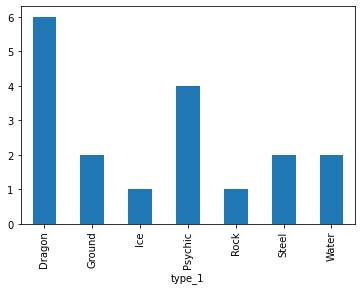

In [13]:
pk.query("legendary==True & generation==3").groupby(['type_1'])['type_1'].count().plot(kind="bar")

- Mengelompokkan 20 teratas Pokemon legendary yang memiliki speed tertinggi berdasarkan tipe 2 pokemon tersebut dengan catatan tipe 2 tidak boleh bernilai `none`

In [14]:
pk.query("legendary==True & type_2!='None'").sort_values('speed', ascending=False).iloc[:20].groupby('generation')['generation'].count()

generation
1    2
2    1
3    6
4    2
5    7
6    2
Name: generation, dtype: int64

<AxesSubplot:xlabel='generation'>

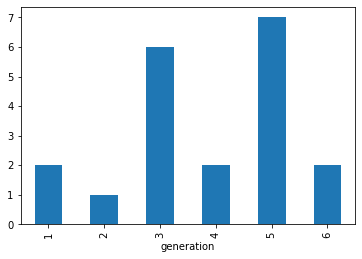

In [15]:
pk.query("legendary==True & type_2!='None'").sort_values('speed', ascending=False).iloc[:20].groupby('generation')['generation'].count().plot(kind="bar")

## Conclusions
<hr>

### Data Loading & Data Cleaning
Dataset `pokemon.csv` yang berhasil dimuat menggunakan fungsi `read_csv()`pada awalnya memiliki 800 baris terkecuali pada kolom `type_2` yang hanya memiliki 414 nilai(baris), hal ini berarti tidak semua pokemon memiliki dua tipe elemen. Baris yang tidak memiliki nilai pada kolom `type_2` dapat ditangani dengan mengisi nilai `none`, sehingga jumlah baris yang dimiliki oleh `type_2` bisa sama dengan kolom-kolom lainnya.

<img src="img/Picture1.png" width="500px" />

Nama-nama kolom kemudian diubah menjadi bentuk format `nama_kolom` agar lebih mudah saat pemanggilan kolom yang dibutuhkan. Contoh: `Type_1`=>`type_1`

Beberapa kolom yang tidak dibutuhkan juga dihapus seperti `defense`, `sp_attack`, `sp_def`, dan `total`. Hal ini cukup bisa mengurangi penggunaan memori yang digunakan

### Data Query

Dari hasil query yang dieksekusi dapat diketahui bahwa:
1.  - Rata-rata HP Pokemon bertipe 'Rock': 65.36363636363636
    - 5 Pokemon teratas yang memiliki HP diatas rata-rata ialah:
**Aurorus, Tyranitar, Mega Tyranitar, Rampardos, Terrakion**

2.  - Rata-rata ATK Pokemon Legendary:  116.67692307692307
    - 5 Pokemon legendary terbawah yang memiliki ATK dibawah rata-rata ialah: **Regice, Deoxys Defense Forme, Suicune, Registell, Uxie**

3. Pokemon generasi ke-2 yang memiliki speed terendah adalah **Snuckle** dengan hanya bernilai `5` poin

### Grouping & Aggregation

Dari hasil query yang dieksekusi dapat diketahui bahwa:

- Generasi ke-3 memiliki jumlah pokemon legendary paling banyak dengan berjumlah **18** pokemon, sedangkan yang paling sedikit ada pada generasi kedua dengan hanya berjumlah **5** pokemon. Berikut gambaran lengkap hasil pengelompokkan:

<img src="img/group_1.png" width="400px" />

- Pokemon Legendary bertipe `Dragon` merupakan pokemon yang paling banyak ditemukan pada generasi ke-3 dengan berjumlah **6** pokemon. Sedangkan `Ice` dan `rock` paling sedikit dengan hanya memiliki **1** pokemon. Berikut visualisasi hasil pengelompokkan:

<img src="img/group_2.png" width="400px" />

- Pokemon Legendary pada generasi ke-5 memiliki jumlah pokemon dengan top speed tertinggi sebanyak **7** pokemon. Sedangkan generasi ke-2 paling sedikit dengan hanya memiliki **1** pokemon. Berikut visualisasi hasil pengelompokkan:

<img src="img/group_4.png" width="400px" />